In [4]:
import  pyteomics
from pyteomics import pepxml, auxiliary, protxml
import pickle
import pandas as pd
import os
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib_venn import venn3
import re
from explore_import import *

In [ ]:
#database

In [10]:
UPfasta_file='./../ionbot_openprot/Human_2023_01_canonical.fasta'
#input_file = open(UPfasta_file)
UPfasta = SeqIO.to_dict(SeqIO.parse(UPfasta_file, "fasta"))
UPfasta={key:str(values.seq) for key,values in UPfasta.items()}

In [11]:
TRfasta_file='./../ionbot_openprot/Human_2023_01_trembl.fasta'
#input_file = open(OPfasta_file)
TRfasta = SeqIO.to_dict(SeqIO.parse(TRfasta_file, "fasta"))
TRfasta={key:str(values.seq) for key,values in TRfasta.items()}

In [12]:
OPfasta_file='./../ionbot_openprot/openprot_2_0_0-human-ensembl106+refseq+uniprot2022_06_01.fasta'
#input_file = open(OPfasta_file)
OPfasta = SeqIO.to_dict(SeqIO.parse(OPfasta_file, "fasta"))
OPfasta={key:str(values.seq) for key,values in OPfasta.items()}

In [15]:
up=set(UPfasta.values())
tr=set(TRfasta.values())
op=set(OPfasta.values())

In [18]:
len(up.symmetric_difference(tr))

83114

In [19]:
len(up.symmetric_difference(op))

663285

In [20]:
len(tr.symmetric_difference(op))

585563

In [21]:
#how many entiries of swiss-prot were not in TrEMBL and OpenProt?
len(up-tr.union(op))

0

In [24]:
#how many entiries of swiss-prot were not in OpenProt?
len(up-op)

102

In [29]:
#percent of sequences unique to swiss-Prot but not OpenProt database
(len(up-op)/len(up))*100

0.5016722408026756

In [23]:
#how many entiries of  TrEMBL were not in swiss-prot and OpenProt?
len(tr-up.union(op))

2696

In [27]:
#percent of sequences unique to TrEMBL database
(len(tr-up.union(op))/len(tr))*100

2.606190669528063

In [25]:
#how many entiries of  TrEMBL were not in OpenProt?
len(tr-op)

2798

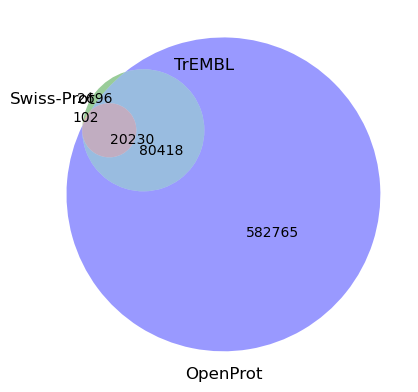

In [13]:
venn3((set(UPfasta.values()),set(TRfasta.values()),set(OPfasta.values())), set_labels = ('Swiss-Prot', 'TrEMBL', 'OpenProt'))

In [ ]:
#open

In [2]:
combined_first_datasets=pickle.load(open('combined_first_datasets.pickle', 'rb'))
combined_peptides_datasets=pickle.load(open('combined_peptides_datasets.pickle', 'rb'))

In [3]:
psm_df=pd.concat([combined_first_datasets[dataset_name]["openprot"] for dataset_name in combined_first_datasets])
psm_df = psm_df.explode('proteins_list').reset_index(drop=True)

In [4]:
psm_df.to_pickle("open_protein_expended_combined_first.pkl")

In [5]:
peptide_df=pd.concat([combined_peptides_datasets[dataset_name]["openprot"] for dataset_name in combined_peptides_datasets])
peptide_df = peptide_df.explode('proteins_list').reset_index(drop=True)

In [6]:
peptide_df.to_pickle("open_protein_expended_combined_peptides.pkl")

In [7]:
del combined_first_datasets, combined_peptides_datasets, psm_df, peptide_df

In [ ]:
#closed

In [8]:
combined_first_datasets=pickle.load(open('closed_combined_first_datasets.pickle', 'rb'))
combined_peptides_datasets=pickle.load(open('closed_combined_peptides_datasets.pickle', 'rb'))

In [9]:
psm_df=pd.concat([combined_first_datasets[dataset_name]["openprot"] for dataset_name in combined_first_datasets])
psm_df = psm_df.explode('proteins_list').reset_index(drop=True)

In [10]:
psm_df.to_pickle("closed_protein_expended_combined_first.pkl")

In [11]:
peptide_df=pd.concat([combined_peptides_datasets[dataset_name]["openprot"] for dataset_name in combined_peptides_datasets])
peptide_df = peptide_df.explode('proteins_list').reset_index(drop=True)

In [12]:
peptide_df.to_pickle("closed_protein_expended_combined_peptides.pkl")


In [13]:
del combined_first_datasets, combined_peptides_datasets, psm_df, peptide_df
